# Analysing Census Income Data Set
#### Student Name: Maurício de Oliveira Reis 
#### Student ID: D21125621

## Introduction

In this notebook we are going to explore the Census Income Data Set dataset. The Extraction of this dataset was done by Barry Becker from the 1994 Census database. You can find more about it [in the UCI website](https://archive.ics.uci.edu/ml/datasets/census+income).  
Inequality is a very popular topic now a days, not only in the news but also among lawmakers. Both social factors like race and economic factors like wealth accumulation are debated. 

Here we will take a different approach and look into this topic in the past. In this work, we want to understand what of those 3 factors, if any, were important to determine a person's income back in 1994: race, origin and assets capital gain/loss. 


## Importing and Cleaning Data
Let's start by importing the base dataset and looking at it's data.

In [1]:
#import basic libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
adult_data = pd.read_csv("adult.data")
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The head of this dataset showed that this dataset doesn't come with the column names on it.
The column names from the code below where taken from the UCI website:

In [2]:
adult_dataset_cols = ["age", "workclass", "fnlwgt", "education","education-num",
                      "marital-status","occupation","relationship","race","sex","capital-gain",
                      "capital-loss","hours-per-week","native-country", "salary"]
adult_data = pd.read_csv("adult.data", names = adult_dataset_cols)
adult_data.describe(include="all")


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


The describe command above showed more a few things:
1. Max hours-per-week is 99, this number might be capped at a maximum of 2 digits, if we ought to use this column, we need to check how common those cases are and see if it can affect our analysis.
2. Max capital-gain is the same, might be capped at a maximum of 5 digits and needs further investigation about its impact to be utilized.

In [3]:
adult_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Looking at the info of this dataset, it seems there are't any null values but, we need some further investigation to understand if there aren't any invalid values. Also, salary will be our response variable for this analysis and we would like it to be a categorical variable with two levels.

In [4]:
#converts salary into categorical 
adult_data["salary"] = adult_data["salary"].astype("category")
#lists all unique values for all columns
for col in adult_data:
    print(col)
    print(adult_data[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

Looking at the unique values on each column we can notice a few things:
1. All the string values have a leading ' ' blank space, we need to trim it
2. It seems like NA values on this dataset are being represented by ?, we need to replace it by NaN 
3. There are surprisingly few unique values for capital gain and loss for a dataset of more than 30k lines, that suggests that those values might be grouped somehow or most lines have the same value. We better take a look at the shape of this data to understand if it makes sense and can be used.

Percentage of rows with Capital Gain zero: 91.67
Percentage of rows with Capital Loss zero: 95.33
Number of rows with capital gain and loss:  0


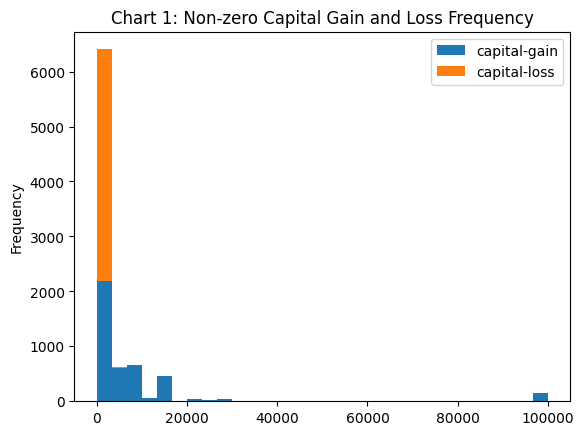

In [5]:
#1. Remove leading spaces from string columns
for col in adult_data:
    if adult_data[col].dtypes == 'object' :
        adult_data[col] = adult_data[col].str.strip()

#2. replace ? by NaN values
adult_data = adult_data.replace({'?': np.nan})

#3. See what is the proportion of people with capital gains, and its distribution
def calculate_percent_of_zeros(data, field):
    num_rows_with_zero = data[data[field] == 0].shape[0]
    num_rows_in_data = data.shape[0]
    return round((num_rows_with_zero * 100) / num_rows_in_data, 2)    
percent_capital_gain_zero = calculate_percent_of_zeros(adult_data, 'capital-gain')    
percent_capital_loss_zero = calculate_percent_of_zeros(adult_data, 'capital-loss')    
print(f"Percentage of rows with Capital Gain zero: {percent_capital_gain_zero}")
print(f"Percentage of rows with Capital Loss zero: {percent_capital_loss_zero}")
non_zero = adult_data[(adult_data["capital-gain"] > 0) | (adult_data["capital-loss"] > 0)]
non_zero[['capital-gain', 'capital-loss']].plot.hist(bins=30, stacked=True, 
                                                 title="Chart 1: Non-zero Capital Gain and Loss Frequency")
# Making sure there are no rows with both capital-gain and loss
num_of_rows_with_gain_and_loss = adult_data.loc[(adult_data["capital-gain"] != 0) & (adult_data["capital-loss"] != 0), ["capital-gain", "capital-loss"]].shape[0]
print(f"Number of rows with capital gain and loss:  {num_of_rows_with_gain_and_loss}")


The vast majority of the rows on this dataset don't have either capital gains or loss which might partially explain so few unique values for it that we saw before but, Chart 1 shows a big gap between 30k capital gain and 99999 which migh again suggest a grouping of people, specially people who earn 99999 or more. In any case, we will move on our analisys assuming this values are grouped and correct, not some missing data. 
Also, there are no rows with both, capital gains and loss different from zero, it's good to know that we don't have this inconsistency in the data.

#### Impact of NaN Values on Dataset
Now that I identified the missing values and transformed them from ? to NaN, we can better understand what is the impact on the dataset and if we need to take any further action before starting our exploratory data analysis.

In [6]:
#Finding NAs in all columns
num_rows_in_data = adult_data.shape[0]
print(f"In a total of {num_rows_in_data}")
for col in adult_data:
    quantity_of_na = adult_data[col].isna().sum()
    # Print only columns with NAs 
    if quantity_of_na:
        percent_of_na = round((quantity_of_na * 100) / num_rows_in_data, 2)
        print(f"{col} has {quantity_of_na} NAs which is {percent_of_na}% of its rows.")



In a total of 32561
workclass has 1836 NAs which is 5.64% of its rows.
occupation has 1843 NAs which is 5.66% of its rows.
native-country has 583 NAs which is 1.79% of its rows.


As this is a quite large dataset with more than 32k rows, the quantity and propostion of NAs on those columns should not have a significant impact on our analysis. 

## Exploratory Data Analysis
Now that we cleaned and formatted the dataset, we can explore it better. 

### Does Race Influence on Salary?
First, let's try to visualize Adult Population by race:

Quantity of missing values for race: 0


<AxesSubplot: title={'center': 'Plot 2: Adults per Race'}>

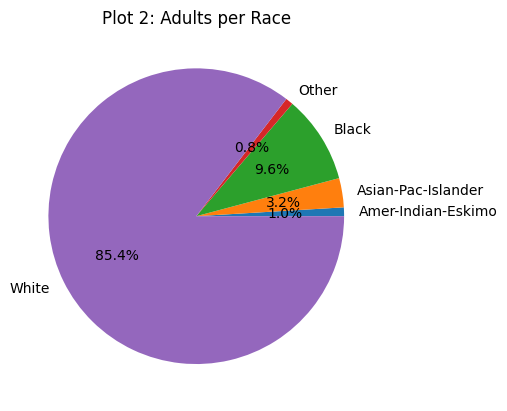

In [7]:
print("Quantity of missing values for race: " + 
      str(adult_data['race'].isnull().sum()))
adult_data.groupby(['race']).size().plot(
    kind='pie', autopct='%1.1f%%',
    title='Plot 2: Adults per Race', )

As we can see, the vast majority of people on this chart is considered White. We don't see hispanic as a race here and there is no information on the dataset if they are incorporated on the White proportion of it. If that's the case, we can get our analysis affected by that. In any case, let's see for each race the proportion of above 50k earners:


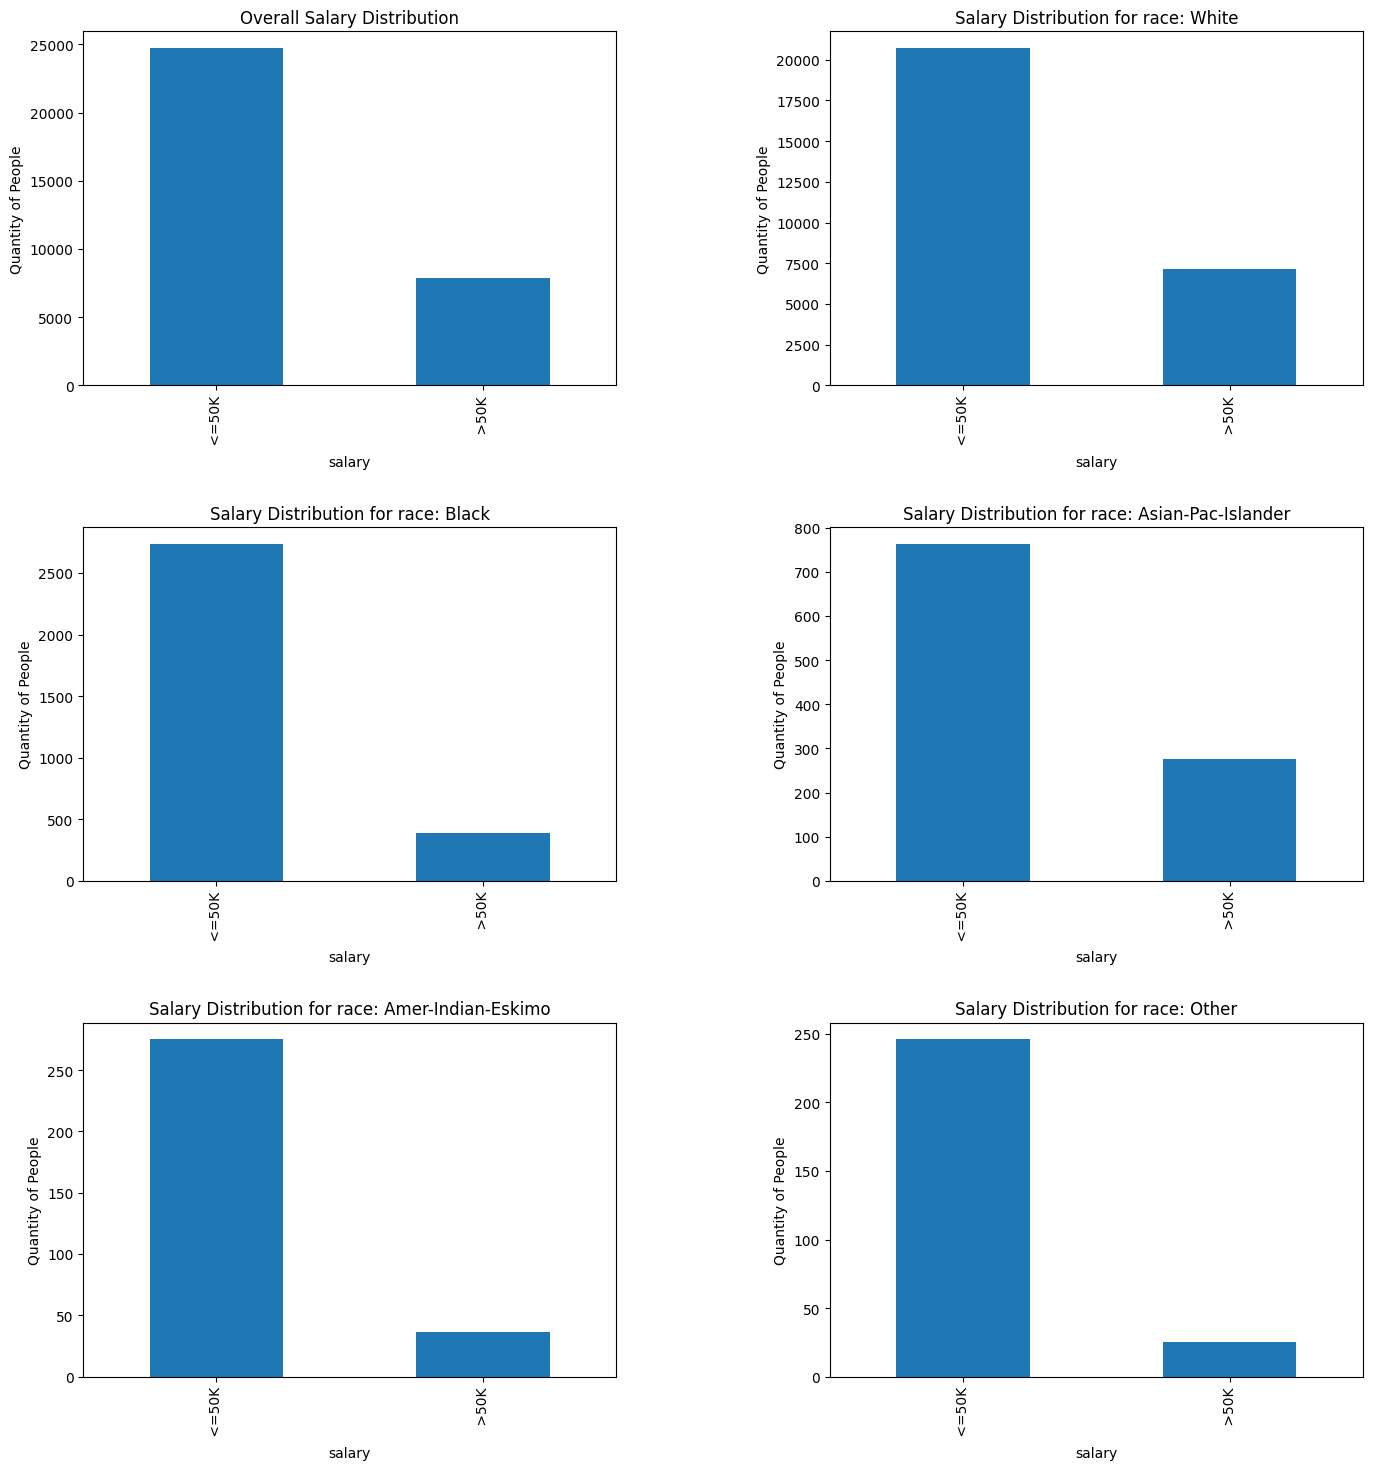

In [8]:
plt.subplot(6, 2, 1)
ax = adult_data["salary"].value_counts().plot(
    kind='bar', title = "Overall Salary Distribution",
    ylabel="Quantity of People", xlabel="salary")
i=2
for race in adult_data["race"].unique():
    plt.subplot(6, 2, i)
    adult_data[adult_data["race"] == race].salary.value_counts().plot(
        kind='bar', title = "Salary Distribution for race: " + race,
        ylabel="Quantity of People", xlabel="salary")
    i = i + 1
plt.subplots_adjust(left=0.0,
                    bottom=0.0,
                    right=2.0,
                    top=5.9,
                    wspace=0.4,
                    hspace=0.4)


From a quick look in the data, we can see that Whites and Asian-Pac-Islander have a higher proportion of people earning more than 50k a year. Let's look at the exct percentages:

In [19]:
def get_percentage_above_50k(dataset, filter_attribute = None, filter_value = None):
    if filter_attribute:
        dataset = dataset[dataset[filter_attribute] == filter_value]
    total_race_num_rows = dataset.shape[0]    
    above_50 = dataset[dataset["salary"] == ">50K"]
    above_50_nrows = above_50.shape[0]
    return round(above_50_nrows * 100 / total_race_num_rows, 2)

print("Overall percentage of Salary Distribution: " 
      + f"{get_percentage_above_50k(adult_data)}%")
for race in adult_data["race"].unique():
    print(f"Percentage of Salary Distribution for race {race}: " 
      + f"{get_percentage_above_50k(adult_data,'race',race)}%")


Overall percentage of Salary Distribution: 24.08%
Percentage of Salary Distribution for race White: 25.59%
Percentage of Salary Distribution for race Black: 12.39%
Percentage of Salary Distribution for race Asian-Pac-Islander: 26.56%
Percentage of Salary Distribution for race Amer-Indian-Eskimo: 11.58%
Percentage of Salary Distribution for race Other: 9.23%


As we can see, Whites and Asian-Pac-Islander more commonly used to earn above 50k a year. We can also see that, since Whites are the vast majority of the population on this dataset, it also means the overall percentage of salary distribution is quite close to the Whites salary distribution.

### Does Native Country Influence on Salary?
Let's try to do the same that we did for race with Native Country.

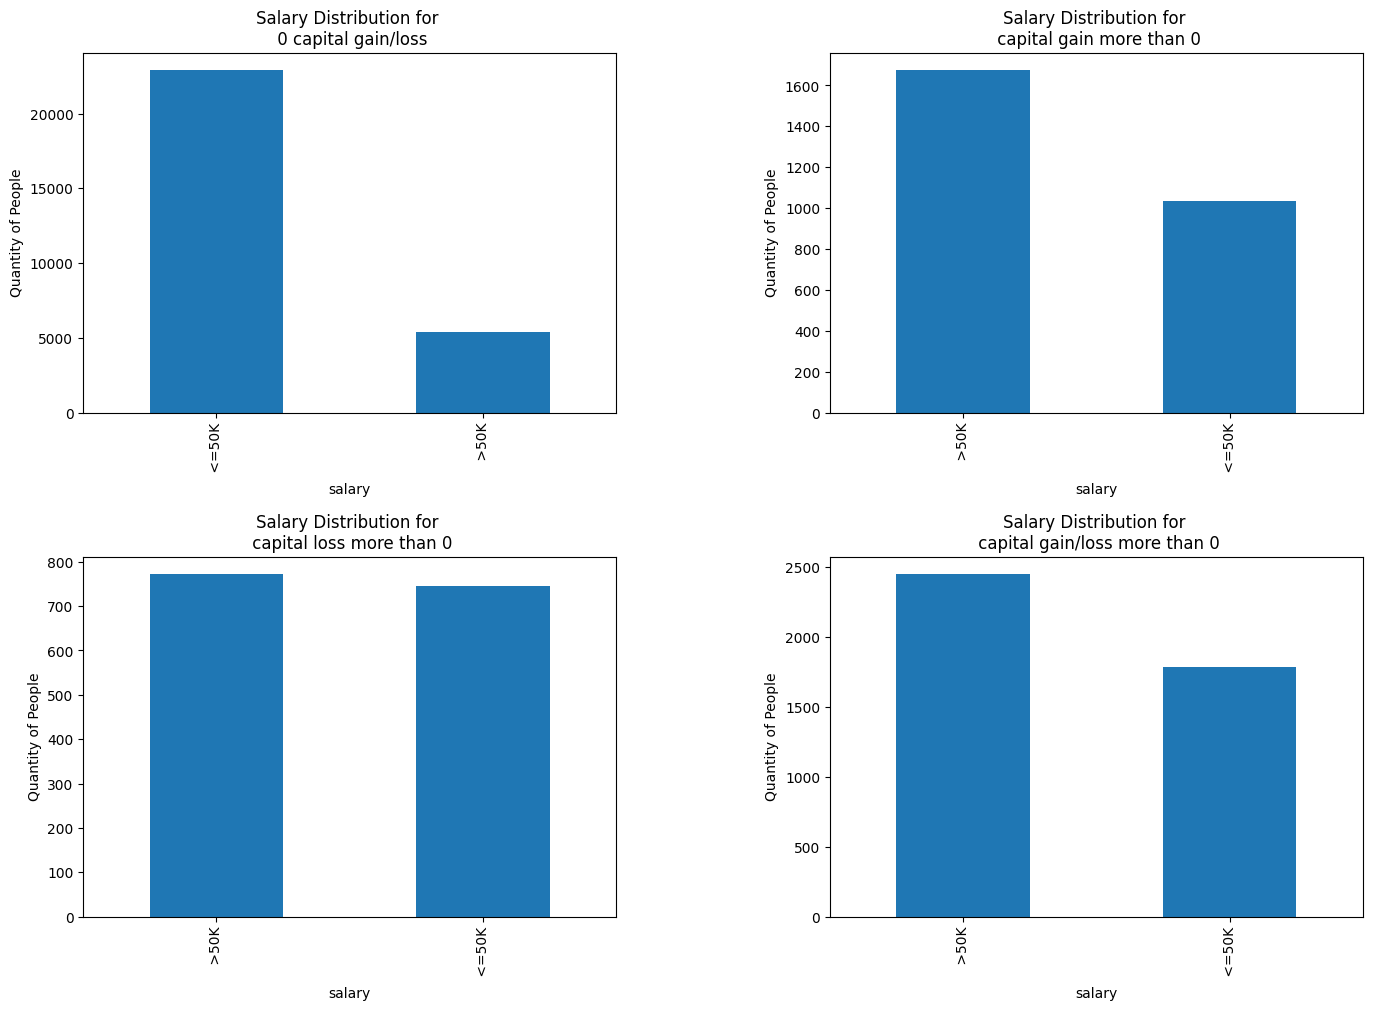

In [16]:
plt.subplot(2, 2, 1)
adult_data[(adult_data["capital-gain"] == 0) & (adult_data["capital-loss"] == 0)].salary.value_counts().plot(
    kind='bar', title = "Salary Distribution for \n 0 capital gain/loss",
    ylabel="Quantity of People", xlabel="salary")

plt.subplot(2, 2, 2)
adult_data[(adult_data["capital-gain"] != 0)].salary.value_counts().plot(
    kind='bar', title = "Salary Distribution for \n capital gain more than 0",
    ylabel="Quantity of People", xlabel="salary")

plt.subplot(2, 2, 3)
adult_data[(adult_data["capital-loss"] != 0)].salary.value_counts().plot(
    kind='bar', title = "Salary Distribution for \n capital loss more than 0",
    ylabel="Quantity of People", xlabel="salary")

plt.subplot(2, 2, 4)
adult_data[(adult_data["capital-gain"] != 0) | (adult_data["capital-loss"] != 0)].salary.value_counts().plot(
    kind='bar', title = "Salary Distribution for \n capital gain/loss more than 0",
    ylabel="Quantity of People", xlabel="salary")

plt.subplots_adjust(left=0.0,
                    bottom=0.0,
                    right=2.0,
                    top=1.8,
                    wspace=0.4,
                    hspace=0.4)



<AxesSubplot: title={'center': 'Plot 3: Adults per Native Country'}>

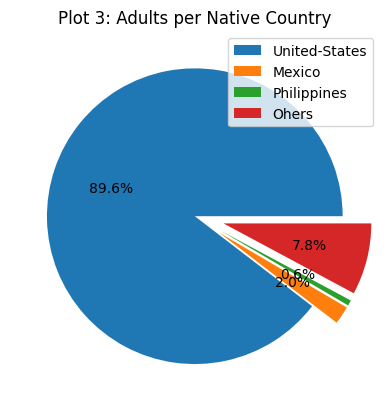

In [14]:
grouped_by_country_top = adult_data.groupby(['native-country']).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(3)

adult_data_without_top_contries = adult_data[~adult_data['native-country'].isin(grouped_by_country_top['native-country'])] 
total_rows_on_others = adult_data_without_top_contries.shape[0]
others_df = pd.DataFrame([['Ohers', total_rows_on_others]],
                         columns=['native-country', 'count'])
grouped_by_country_top_and_others = pd.concat([grouped_by_country_top, others_df])

grouped_by_country_top_and_others.set_index('native-country')

grouped_by_country_top_and_others.plot(
    kind='pie',y='count', ylabel='', 
    title='Plot 3: Adults per Native Country', 
    labels=grouped_by_country_top_and_others['native-country'], 
    autopct='%1.1f%%', labeldistance=None,
    explode= (0.0, 0.2, 0.2, 0.2))


This dataset suggests that nearly 90% of people living in US in 1994 was born in US, with the second biggest nationality being Mexican. his chart only showed a few nationalities because there is a large number of nationalities with very few rows in the dataset. Below we can see all nationalities, their repective number of people and percentage of people from this nationality that make more than 50k per year:

In [15]:
country_grouping_data = adult_data.groupby(['native-country']).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 
country_grouping_data['percent_of_above_50_per_year'] = 0
for country in country_grouping_data['native-country']:
    country_grouping_data.loc[country_grouping_data['native-country'] == country,'percent_of_above_50_per_year'] = get_percentage_above_50k(adult_data,'native-country',country)
country_grouping_data

,native-country,count,percent_of_above_50_per_year
38,United-States,29170,0
25,Mexico,643,0
29,Philippines,198,0
10,Germany,137,0
1,Canada,121,0
32,Puerto-Rico,114,0
7,El-Salvador,106,0
18,India,100,0
4,Cuba,95,0
8,England,90,0


The table above gives some insights about imigration to US: 
1. With exception of Cuba, imigrants from all other countries from Latin America have a lower percentage of people earning more than 50k a year than us born citizens.
2. Also, imigrants from some countries from outside the American continent that are less rich than US, have a higher percentage of people eaning more than 50k a year than us born citizens. Noticiably, India with 40% and Iran with 41.86%,

### Does capital gain/loss influence on salary?
If a person has capital gains/loss, it means this person has some asset like stocks or real state and sold it during that fiscal year. As we know very few people on this dataset have capital gain/loss, let's focus only in the fact of people either having it or not capital gain/loss influencing the likelihood of earning more than 50k a year.


As we can see in the charts above, having assets seems to have a correlation with having a salary above 50k, or at least having and selling them or some of them which results in capital gain or loss. In fact, nearly 50% of the group who had capital loss had a salary above 50k, way above the percentage of the overall population of 24%. 

## Conclusion
In this dataset, we've analysed the relationship between race, native country and capital gain/loss with having a salary of more or less than 50k a year. In this report we noticed that:
1. In the overall population, 24% make more than 50k a year.
2. On race, White and Asian and Pacific Islander have a higer number of people earning more than 50k a year than the other races.
2. On Country of origin, immigrants from Latin America, execpt Cuba, have a smaller number of people earning more than 50k a year. And for many countries outside the Americas, including some underdeveloped ones, immigrants had a higher percentage of above 50k earners, with some percentages as high as 40% like immigrants from India. A further analisys on the workclass and education of those immigrants could perhaps clarify the reasons for this difference.  
3. Having capital gain or loss vs not having it is where we found the strongest differences on our analysis where for the group who had capital loss, nearly 50% of the population earned more than 50k a year.